The problem texts and the dataset were taken from **Zindi**. Zindi hosts the largest community of African data scientists, working to solve the world’s most pressing challenges using machine learning and AI.

Zindi: https://zindi.africa/

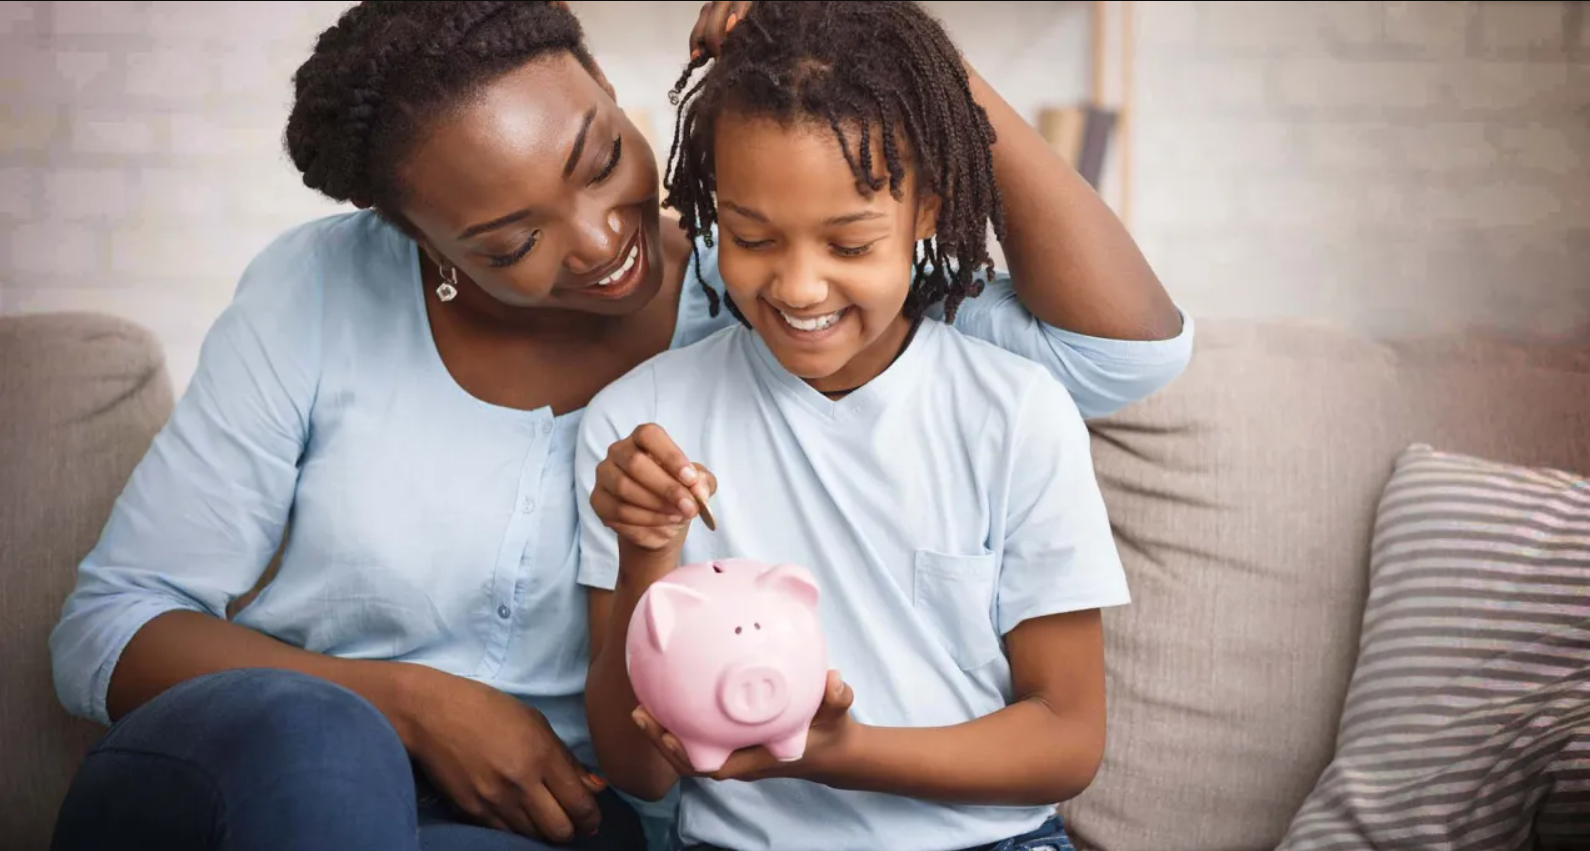

# CONTEXT OF THE PROBLEM

Financial inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 14% of adults) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa, and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enable households to save and make payments while also helping businesses build up their credit-worthiness and improve their access to loans, insurance, and related services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The objective of this competition is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key factors driving individuals’ financial security.

# THE PROBLEM

You are asked to predict the likelihood of the person having a bank account or not (Yes = 1, No = 0), for each unique id in the test dataset . You will train your model on 70% of the data and test your model on the final 30% of the data, across four East African countries - Kenya, Rwanda, Tanzania, and Uganda.

# UNDERSTANDING THE PROBLEM

**Motivation**: Identify people who will have a bank account
    
**Problem type**: Predict the probability of a person having a bank account

**Potential Methods**: Classification

**Granularity**: Probability prediction per customer

**Solution Delivery**: WebApp, WebPage, Website

**Data to solve the problem**: https://zindi.africa/competitions/financial-inclusion-in-africa/data

# 0.0 IMPORTS

In [1]:
# manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
import seaborn as sns

## 0.1 Auxiliary Functions

In [ ]:
def plot_bar(df, column, color=False):
    
    # calculating %
    percentage_categorical = df[column].value_counts(normalize=True).sort_values(ascending=False)
    
    # creating figure
    sns.barplot(x=percentage_categorical.index, y=percentage_categorical.values)
    sns.despine(right=True)
    plt.xlabel(column)
    plt.ylabel('interviewed (%)');

## 0.2 Data Loading

In [2]:
# training and test
df_train = pd.read_csv('C:/Users/jhona/repos/Bank-Account-Predict-Africa/data/Train.csv')
df_test = pd.read_csv('C:/Users/jhona/repos/Bank-Account-Predict-Africa/data/Train.csv')

# data to submission in the competion and variable definitions
df_var_def = pd.read_csv('C:/Users/jhona/repos/Bank-Account-Predict-Africa/data/VariableDefinitions.csv')
df_submission = pd.read_csv('C:/Users/jhona/repos/Bank-Account-Predict-Africa/data/SampleSubmission.csv')

display(df_train.head())

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


# 1.0 DATA DESCRIPTION

## 1.1 Data Dimension

In [3]:
print('Rows:', df_train.shape[0])
print('Columns:', df_train.shape[1])

Rows: 23524
Columns: 13


## 1.2 Columns

In [4]:
df_var_def

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


## 1.3 Data Type

In [5]:
df_train.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

The dataset has 3 numeric variables and 10 categorical variables.

## 1.4 Duplicate Data

In [6]:
# checking for duplicate data
display(df_train.loc[df_train.duplicated(subset='uniqueid')].head())

# count of unique people interviewed
print('Unique ID (Not Duplicated):', len(df_train['uniqueid'].unique()))

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
6068,Rwanda,2016,uniqueid_1,No,Urban,Yes,7,18,Female,Child,Single/Never Married,Secondary education,Remittance Dependent
6069,Rwanda,2016,uniqueid_2,Yes,Urban,Yes,4,26,Female,Spouse,Married/Living together,Secondary education,Self employed
6070,Rwanda,2016,uniqueid_3,No,Rural,No,6,42,Male,Head of Household,Married/Living together,No formal education,Farming and Fishing
6071,Rwanda,2016,uniqueid_4,Yes,Urban,Yes,1,41,Male,Head of Household,Single/Never Married,Tertiary education,Informally employed
6072,Rwanda,2016,uniqueid_5,No,Rural,No,4,17,Female,Child,Single/Never Married,Primary education,Informally employed


Unique ID (Not Duplicated): 8735


There are duplicate unique unique ids. Apparently more than 1 interview was carried out for each interviewee, in some interviews the person had a bank account and in others they did not

## 1.5 Missing Data

In [7]:
df_train.isna().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

There is no missing data

## 1.6 Descriptive statistics

### 1.6.1 Numeric Variable

In [8]:
df_train.describe().T.round(0)

,count,mean,std,min,25%,50%,75%,max
year,23524.0,2017.0,1.0,2016.0,2016.0,2017.0,2018.0,2018.0
household_size,23524.0,4.0,2.0,1.0,2.0,3.0,5.0,21.0
age_of_respondent,23524.0,39.0,17.0,16.0,26.0,35.0,49.0,100.0


- **household_size**: 25% of respondents have 2 people living in the house, 50% of respondents have 3 and 75% of respondents have 5. There are also people who only have 1 person living in the house and people who have 21.


- **age_of_respondent**: The dataset contains interviewees from 16 to 100 years old. People have an average age of 39 years old

### 1.6.2 Categorical Variable

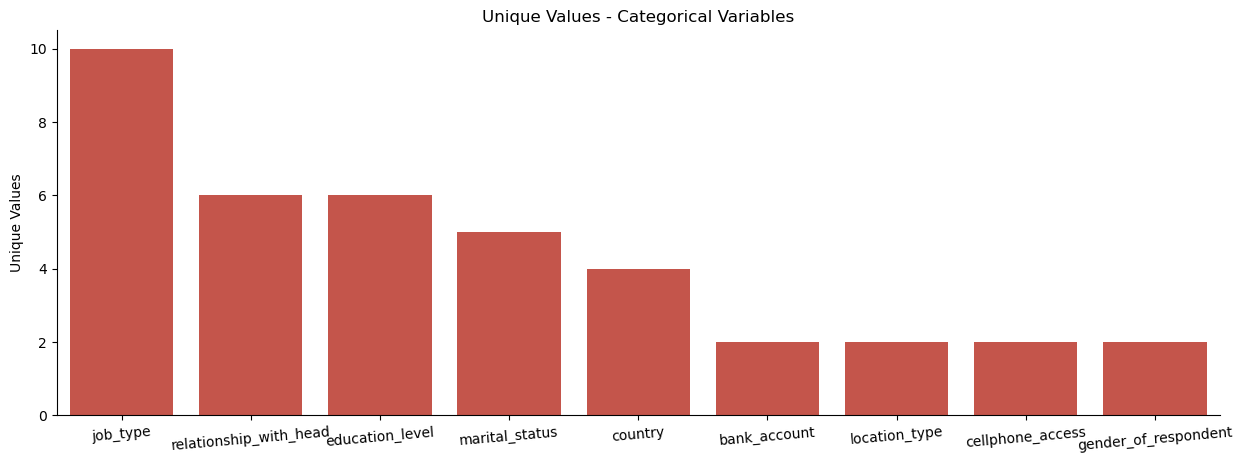

In [9]:
# selecting categorical variables
df_train_categorical = df_train.select_dtypes(include=['object']).drop(columns=['uniqueid'])

# counting unique values in each column
describe_categorical = df_train_categorical.apply(lambda x: len(x.unique())).sort_values(ascending=False)

# creating figure
plt.figure(figsize=(15, 5))
sns.barplot(x=describe_categorical.index, y=describe_categorical.values, color='#D84437')
sns.despine(right=True)
plt.title('Unique Values - Categorical Variables')
plt.xticks(rotation=5)
plt.ylabel('Unique Values');

In general, columns do not have many unique values. The column that has the most values is <ins>job_type</ins> with 10 possible unique values

# 2.0 FEATURE ENGINEERING

## 2.1 Hypotheses

**1.** People who are located in rural areas opened fewer bank accounts.

**2.** Younger people opened fewer bank accounts.

**3.** People with a higher level of education opened more bank accounts.

**4.** People who have many people living in the house, opened fewer bank accounts.

**5.** Women opened fewer bank accounts.

**6.** People who have access to a telephone/cell phone opened more bank accounts.

**7.** Women who are head of household opened fewer bank accounts.

**8.** People who have formal private employment opened more bank accounts.

**9.** People who are married/live together opened more bank accounts.

**10.** People who were interviewed more recently opened more bank accounts.

**11.** People from Rwanda opened fewer bank accounts.

## 2.2 Feature Engineering

# 3.0 DATA FILTERING

## 3.1 Row filtering

## 3.2 Column Filtering

# 4.0 EXPLORATORY ANALYSIS

## 4.1 Univariate Analysis

### 4.1.1 Target variable

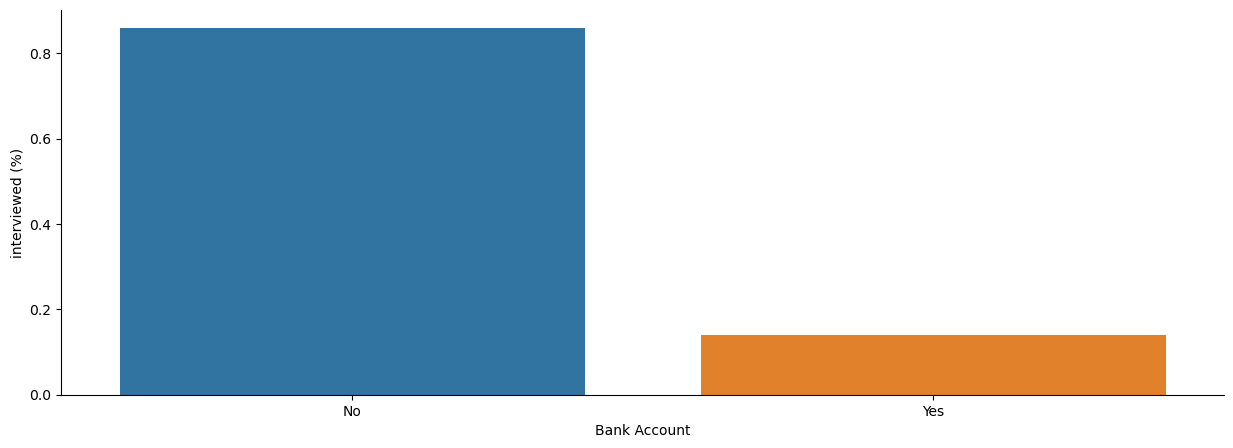

In [17]:
# bank account - %
bank_acount_distribuition = df_train['bank_account'].value_counts(normalize=True)

# creating a figure
plt.figure(figsize=(15, 5))
sns.barplot(x=bank_acount_distribuition.index, y=bank_acount_distribuition.values)
sns.despine(right=True)
plt.ylabel('interviewed (%)')
plt.xlabel('Bank Account');

**85%** of people interviewed do not have a bank account, only **14%** have a bank account

### 4.1.2 Numeric Variable

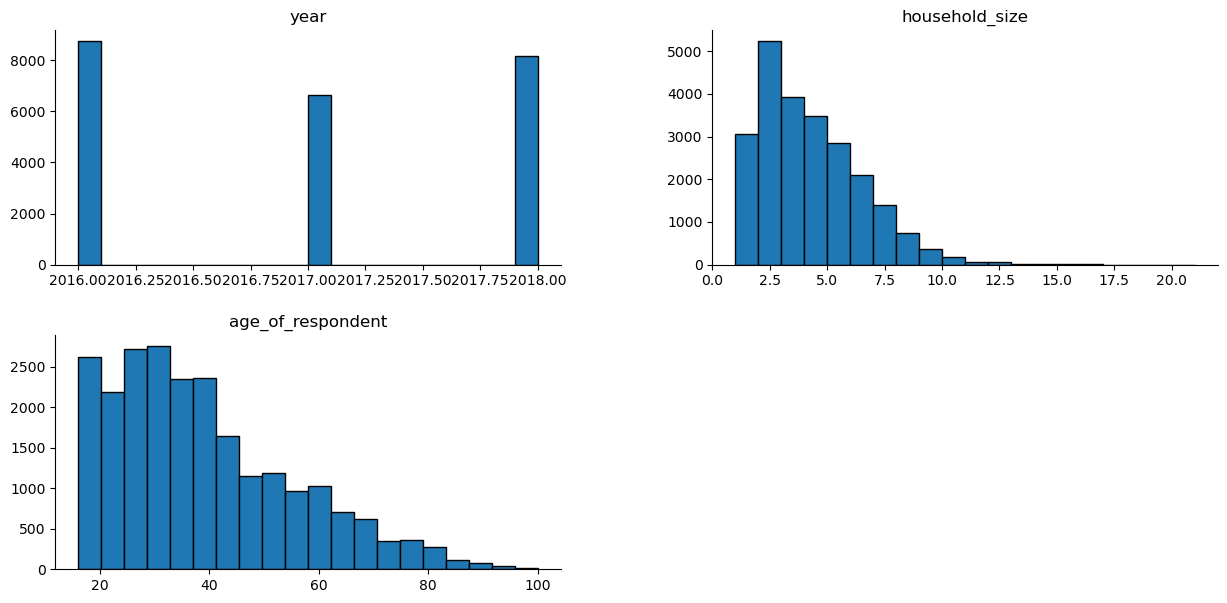

In [26]:
df_train.hist(figsize=(15, 7), grid=False, ec='k', bins=20)
sns.despine(right=True);

### 4.1.3 Categorical Variable

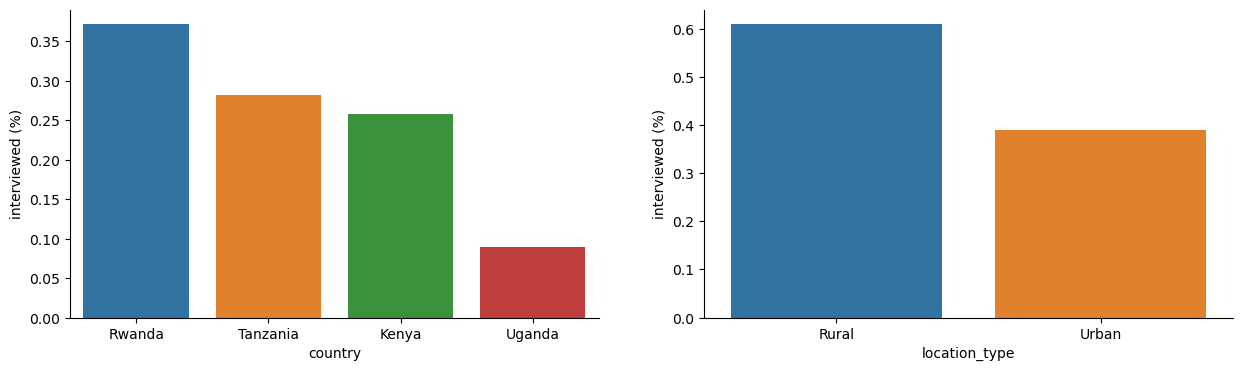

In [72]:
# country
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plot_bar(df_train, 'country')

# location_type
plt.subplot(1, 2, 2)
plot_bar(df_train, 'location_type')

**Insight**: Most of the interviewees are from Rwanda and have a rural location. Only 8% of interviewees are from Uganda, while 37% are from Rwanda

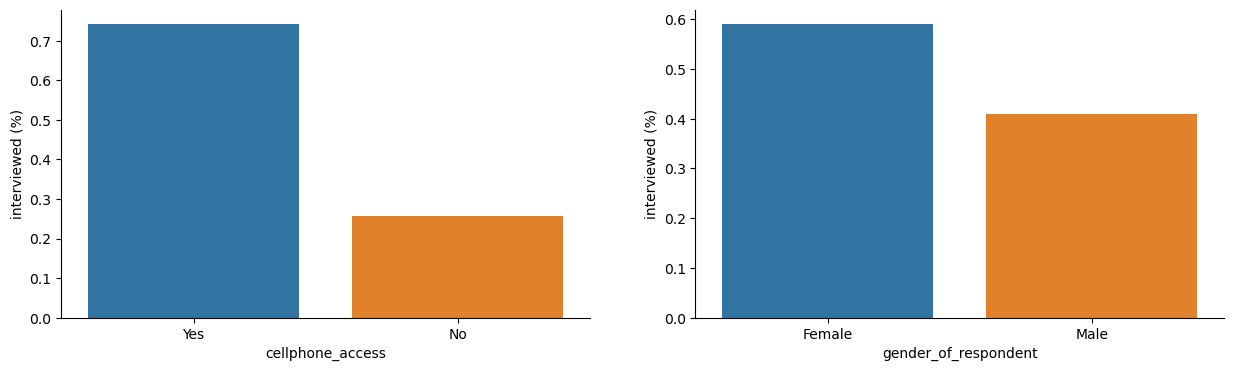

In [74]:
# cellphone_access
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plot_bar(df_train, 'cellphone_access')

# location_type
plt.subplot(1, 2, 2)
plot_bar(df_train, 'gender_of_respondent')

**Insight**: 

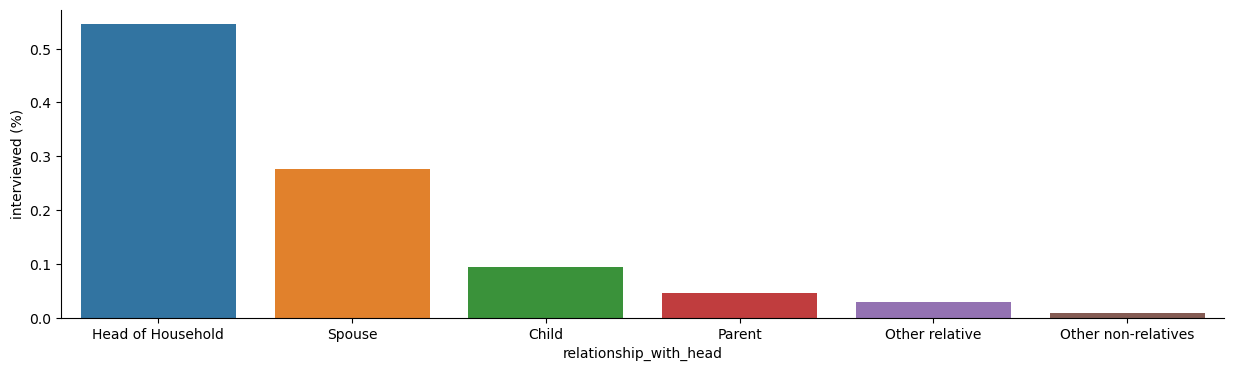

In [75]:
# relationship_with_head
plt.figure(figsize=(15, 4))
plot_bar(df_train, 'relationship_with_head')

**Insight**: 

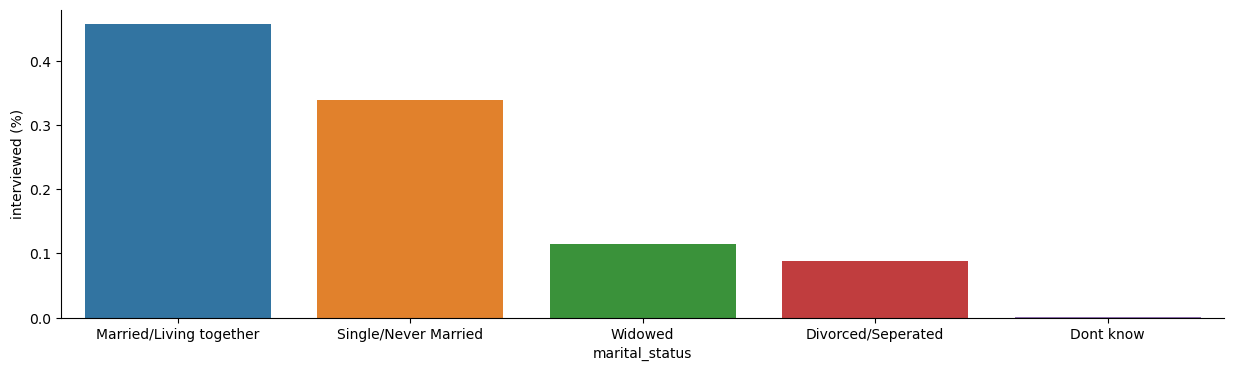

In [76]:
# marital_status
plt.figure(figsize=(15, 4))
plot_bar(df_train, 'marital_status')

**Insight**: 

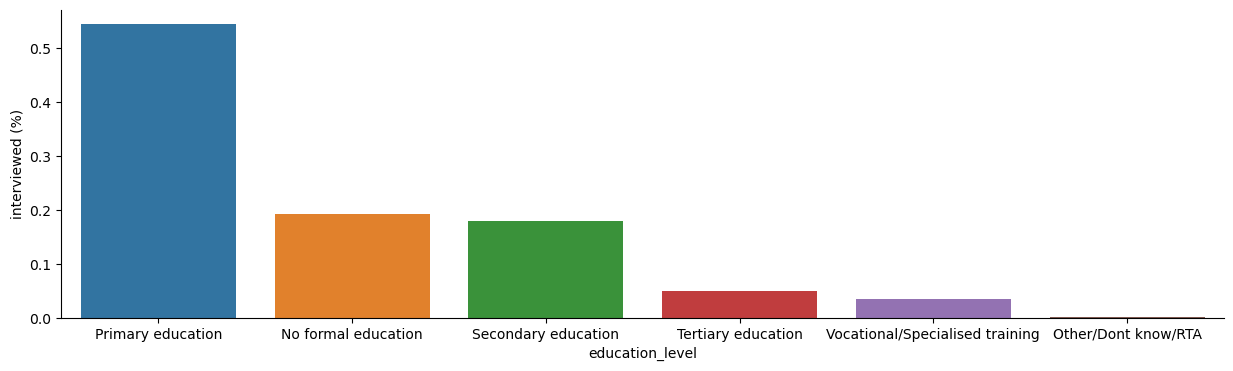

In [77]:
# education_level
plt.figure(figsize=(15, 4))
plot_bar(df_train, 'education_level')

**Insight**: 

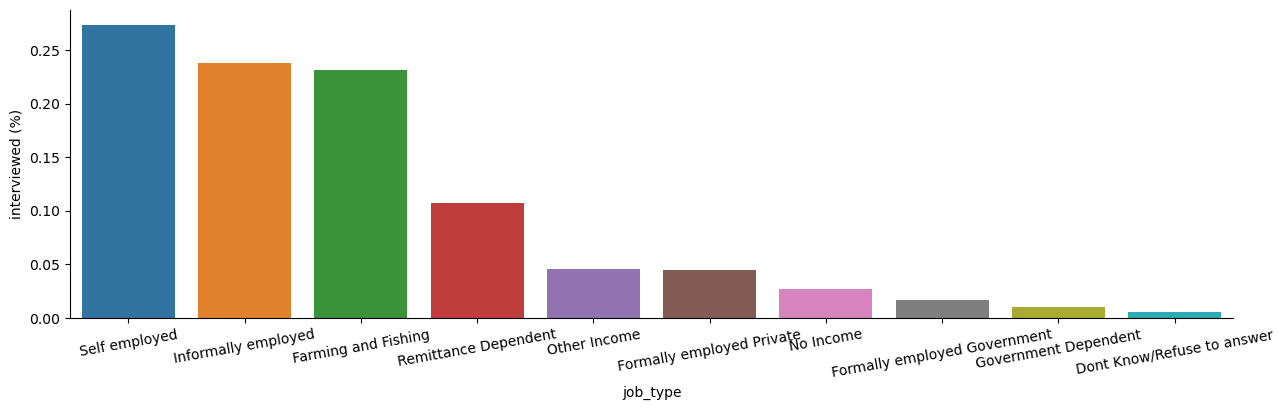

In [78]:
# job_type
plt.figure(figsize=(15, 4))
plot_bar(df_train, 'job_type')
plt.xticks(rotation=10);

**Insight**: 

## 4.2 Bivariate Analysis (Validation of Hypotheses)

## 4.3 Multivariate analysis

# 5.0 DATA PREPARATION

## 5.1 Data splitting

## 5.2 Data Preparation - Training

## 5.3 Data Preparation - Validation

# 6.0 FEATURE SELECTION